In [1]:
import random as rd
import math
from collections import defaultdict
from copy import deepcopy

In [2]:
class Course:
    def __init__(self, code, nlesson, teacher, capacity):
        self.code = code
        self.nlesson = nlesson
        self.teacher = teacher
        self.capacity = capacity
        
    def __str__(self):
        return f"{self.code}"

In [3]:
class Room:
    def __init__(self, code, capacity):
        self.code = code
        self.capacity = capacity
        
    def __str__(self):
        return f"{self.code}"

In [4]:
class Schedule:
    def __init__(self, timetable, usedtime):
        self.timetable = timetable
        self.usedtime = usedtime
        
    def fitness(self):
        error = 0
        check = {}
        for [day, lesson, room, course] in self.timetable:
            if course.capacity > room.capacity:
                error += 1
            if (day, lesson, room) in check.keys():
                error += 1
            else:
                check[(day, lesson, room)] = 1
            if (day, lesson, course.teacher) in check.keys():
                error += 1
            else:
                check[(day, lesson, course.teacher)] = 1
            if (day, lesson, course) in check.keys():
                error += 1
            else:
                check[(day, lesson, course)] = 1
        fitness = 1.0 / (error + 1)
        return fitness

    def errors(self):
        capacity_error = room_error = teacher_error = course_error = 0
        check = {}
        for [day, lesson, room, course] in self.timetable:
            if course.capacity > room.capacity:
                capacity_error += 1
            if (day, lesson, room) in check.keys():
                room_error += 1
            else:
                check[(day, lesson, room)] = 1
            if (day, lesson, course.teacher) in check.keys():
                teacher_error += 1
            else:
                check[(day, lesson, course.teacher)] = 1
            if (day, lesson, course) in check.keys():
                course_error += 1
            else:
                check[(day, lesson, course)] = 1
        return [capacity_error, room_error, teacher_error, course_error]

In [5]:
with open("data/test12.txt") as f:
    lines = f.readlines()

In [6]:
ncourse = int(lines[0].split()[0])
nroom = int(lines[0].split()[1])
nneighbor = 25
nchange = 5

In [7]:
def random_course(data):
    courses = []
    cnt = 0
    for row in data:
        row = row.split()
        courses.append(
            Course(cnt, int(row[0]), int(row[1]), int(row[2]))
        )
        cnt += 1
    return courses

courses = random_course(lines[1:ncourse])

def random_room(data):
    rooms = []
    cnt = 0
    for row in data:
        row = row.split()
        rooms.append(
            Room(cnt, int(row[0]))
        )
        cnt += 1
    return rooms

rooms = random_room(lines[1 + ncourse:])

In [8]:
def init_schedule():
    timetable = []
    usedtime = defaultdict(int)
    for course in courses:
        for _ in range(course.nlesson):
            element = [
                rd.randint(2, 6), 
                rd.randint(1, 12), 
                rooms[rd.randint(0, nroom - 1)], 
                course
            ]
            timetable.append(element)
            usedtime[(element[0], element[1], element[2])] += 1
    return Schedule(timetable, usedtime)

In [9]:
def localsearch(schedule):
    neighbors = []
    for _ in range(nneighbor):
        timetable = schedule.timetable
        usedtime = schedule.usedtime
        for _ in range(nchange):
            idx = rd.randint(0, len(timetable) - 1)
            element = timetable[idx]
            while True:
                day = rd.randint(2, 6)
                lesson = rd.randint(1, 12)
                while True:
                    room = rooms[rd.randint(0, nroom - 1)]
                    if room.capacity >= element[3].capacity:
                        break
                if usedtime[(day, lesson, room)] == 0:
                    usedtime[(element[0], element[1], element[2])] -= 1
                    usedtime[(day, lesson, room)] += 1
                    timetable[idx] = [day, lesson, room, element[3]]
                    break
        neighbor = Schedule(timetable, usedtime)
        neighbors.append(neighbor)
                    
    return neighbors

In [10]:
def metropolis(neighbors, s, t):
    neighbor = rd.choice(neighbors)
    if neighbor.fitness() >= s.fitness():
        return neighbor
    if rd.random() < math.exp((neighbor.fitness() - s.fitness()) / t):
        return neighbor
    return s

In [11]:
fitnesses = []

def stimulated_annealing():
    s = init_schedule()
    opt = deepcopy(s)
    cnt = 1000
    for i in range(0, cnt):
        t = cnt / 1000
        neighbors = localsearch(deepcopy(s))
        s = metropolis(neighbors, s, t)
        if opt.fitness() < s.fitness():
            opt = deepcopy(s)
        fitnesses.append(opt.fitness())
        print(i, ' ', opt.fitness())
    return opt

In [12]:
opt = stimulated_annealing()

0   0.023809523809523808
1   0.06666666666666667
2   0.07142857142857142
3   0.07142857142857142
4   0.07142857142857142
5   0.07142857142857142
6   0.07142857142857142
7   0.08333333333333333
8   0.08333333333333333
9   0.08333333333333333
10   0.08333333333333333
11   0.09090909090909091
12   0.09090909090909091
13   0.09090909090909091
14   0.09090909090909091
15   0.09090909090909091
16   0.09090909090909091
17   0.09090909090909091
18   0.09090909090909091
19   0.1111111111111111
20   0.1111111111111111
21   0.1111111111111111
22   0.1111111111111111
23   0.1111111111111111
24   0.1111111111111111
25   0.1111111111111111
26   0.1111111111111111
27   0.1111111111111111
28   0.1111111111111111
29   0.1111111111111111
30   0.1111111111111111
31   0.1111111111111111
32   0.1111111111111111
33   0.1111111111111111
34   0.16666666666666666
35   0.16666666666666666
36   0.16666666666666666
37   0.16666666666666666
38   0.16666666666666666
39   0.16666666666666666
40   0.16666666666666666

In [13]:
opt.errors()

[0, 0, 2, 0]

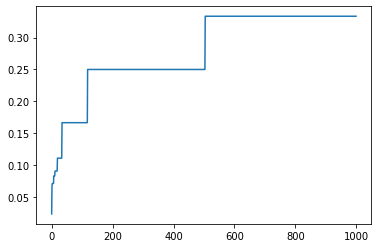

In [14]:
import matplotlib.pyplot as plt


x = range(0, 1000)
plt.plot(x, fitnesses, linestyle="-")